<a href="https://colab.research.google.com/github/sshreeshantha22cs131nc-cloud/samsung_shreeshanth/blob/main/regularization_lasso_ridge_Elastinet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

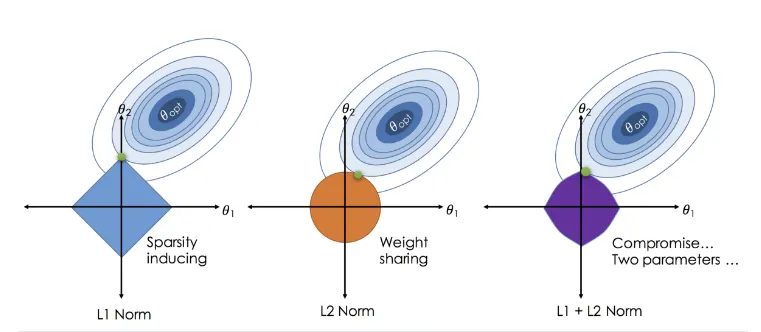

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso  #, ElasticNet

In [3]:
# Create dataset
data = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny',
                'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny',
                'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temperature': [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71, 81, 74, 76, 78, 82,
                   67, 85, 73, 88, 77, 79, 80, 66, 84],
    'Humidity': [85, 90, 78, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 80, 88, 92, 85, 75, 92,
                 90, 85, 88, 65, 70, 60, 95, 70, 78],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False,
             True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29, 25, 51, 41,
                    14, 34, 29, 49, 36, 57, 21, 23, 41]
}

In [4]:
# Process data
df = pd.get_dummies(pd.DataFrame(data), columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Num_Players']]


In [5]:
# Split data
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)


In [6]:

# Scale numerical features
numerical_cols = ['Temperature', 'Humidity']
ct = ColumnTransformer([('scaler', StandardScaler(), numerical_cols)], remainder='passthrough')


In [7]:

# Transform data
X_train_scaled = pd.DataFrame(
    ct.fit_transform(X_train),
    columns=numerical_cols + [col for col in X_train.columns if col not in numerical_cols],
    index=X_train.index
)

In [8]:
X_test_scaled = pd.DataFrame(
    ct.transform(X_test),
    columns=X_train_scaled.columns,
    index=X_test.index
)


#lasso


In [9]:

# Initialize and train the model
model = Lasso(alpha=0.1)  # Option 1: Lasso Regression (alpha is the regularization strength, equivalent to λ, uses coordinate descent)
#model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Option 2: Elastic Net Regression (alpha is the overall regularization strength, and l1_ratio is the mix between L1 and L2, uses coordinate descent)


In [10]:

# Fit the model
model.fit(X_train_scaled, y_train)
model.coef_

array([ -0.70222542,  -2.76079437,  10.88167818,   0.        ,
       -12.10125388, -12.77847897])

In [11]:

# Make predictions
y_pred = model.predict(X_test_scaled)


In [12]:

# Calculate and print RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")


RMSE: 6.8652


In [13]:
# Additional information about the model
print("nModel Coefficients:")


nModel Coefficients:


In [14]:
for feature, coef in zip(X_train_scaled.columns, model.coef_):
    print(f"{feature:13}: {coef:.2f}")

Temperature  : -0.70
Humidity     : -2.76
sunny        : 10.88
overcast     : 0.00
rain         : -12.10
Wind         : -12.78


In [15]:
print(f"Intercept    : {model.intercept_:.2f}")

Intercept    : 43.34


#Ridge

In [16]:
from sklearn.linear_model import Ridge

In [17]:
# Initialize and train the model
ridge_model = Ridge()  # Option 1: Lasso Regression (alpha is the regularization strength, equivalent to λ, uses coordinate descent)

In [18]:

# Fit the model
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [19]:
# Make predictions
ridge_y_pred = ridge_model.predict(X_test_scaled)

In [20]:
# Calculate and print RMSE
ridge_rmse = root_mean_squared_error(y_test, ridge_y_pred)
print(f"RMSE: {ridge_rmse:.4f}")

RMSE: 6.5055


In [21]:
# Additional information about the model
print("nModel Coefficients:")
for feature, coef in zip(X_train_scaled.columns, ridge_model.coef_):
    print(f"{feature:13}: {coef:.2f}")

nModel Coefficients:
Temperature  : 0.48
Humidity     : -2.58
sunny        : 9.31
overcast     : -0.00
rain         : -9.31
Wind         : -9.49


In [22]:
print(f"Intercept    : {ridge_model.intercept_:.2f}")


Intercept    : 41.50


#Elastinet

In [23]:
# Initialize and train the model
elastinet_model = Ridge()  # Option 1: Lasso Regression (alpha is the regularization strength, equivalent to λ, uses coordinate descent)


In [24]:
# Fit the model
elastinet_model.fit(X_train_scaled, y_train)


Ridge()

In [25]:
# Make predictions
elastinet_y_pred = elastinet_model.predict(X_test_scaled)

In [26]:
# Calculate and print RMSE
elastinet_rmse = root_mean_squared_error(y_test, ridge_y_pred)
print(f"RMSE: {elastinet_rmse:.4f}")

RMSE: 6.5055


In [27]:
# Additional information about the model
print("nModel Coefficients:")
for feature, coef in zip(X_train_scaled.columns, elastinet_model.coef_):
    print(f"{feature:13}: {coef:.2f}")

nModel Coefficients:
Temperature  : 0.48
Humidity     : -2.58
sunny        : 9.31
overcast     : -0.00
rain         : -9.31
Wind         : -9.49


In [28]:
print(f"Intercept    : {elastinet_model.intercept_:.2f}")

Intercept    : 41.50
